# Nienadzorowany algorytm KNN

Zbiór danych: https://www.kaggle.com/datasets/abdullah0a/human-age-prediction-synthetic-dataset

Cel biznesowy: stowrzyć grupy pacjentów, w celu optymalizacji obsługi

Dokumentacja: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import matplotlib.cm as cm

In [3]:
# puść ten kod, 
# jeżeli wywołujesz plik  w folderze rozwiąznaia, 
# a ramka danych znajduje się w folderze data
import os 
os.chdir('../')

In [4]:
# Wczytanie danych
df = pd.read_csv("data/Train.csv")
df_numerical = df.select_dtypes(exclude = 'object')
df_scaled  = StandardScaler().fit_transform(df_numerical)
df_scaled = pd.DataFrame(df_scaled, columns = df_numerical.columns)
df_scaled

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,Age (years)
0,0.275255,1.034833,1.037470,0.886932,1.701081,-1.801746,-1.309503,0.821119,-1.685348,-1.036748,0.039486,0.331947,1.726825
1,0.468750,0.538701,1.207329,0.246577,-0.447021,-0.681807,-0.988497,0.531535,-1.578733,1.494861,0.781537,-0.586438,1.143345
2,-1.360965,-1.772009,-1.067962,-1.221225,0.929241,-1.033680,-1.077411,0.526607,-0.648420,1.454120,1.209157,-0.161881,0.802982
3,0.052464,-1.252553,0.785321,-1.363735,0.592362,0.569177,0.187074,2.281748,-0.737829,-0.302987,0.880039,-0.924062,-0.072238
4,-0.520099,0.108355,0.085250,0.465336,1.024787,-1.121453,-0.799873,0.381138,-0.922682,-0.556389,1.532645,-0.597968,1.240592
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-0.748896,1.196960,-1.217680,1.891124,-0.799983,1.468190,0.912375,-1.326802,-0.514566,1.011964,1.677891,0.908292,-1.530938
2996,-0.553984,1.568009,-1.494671,2.140015,-1.398019,1.923961,1.171788,-0.987130,0.418192,-1.179904,-1.354153,0.754861,-1.676808
2997,0.997347,1.040418,0.188101,0.393484,-0.883811,-1.276026,-1.309503,-0.506482,-1.168524,0.849432,0.025132,-1.081338,1.532332
2998,-0.678437,-2.363131,-1.459598,-2.253906,-0.161857,1.174954,0.827733,-0.256565,0.425076,0.945482,-0.200929,-0.260267,-1.141951


In [3]:
# Zmienne w modelu
x_cols = ['Cholesterol Level (mg/dL)','Blood Glucose Level (mg/dL)']

In [4]:
# Próbka danych
df_scaled = df_scaled.iloc[:100,:]

In [5]:
# Model
model = NearestNeighbors(n_neighbors=5, p=1).fit(df_scaled[x_cols])

In [6]:

# Odległości/ indeksy sąsiadów

model.kneighbors(df_scaled[x_cols])

(array([[0.        , 0.36770044, 0.75189115, 1.01595673, 1.04153809],
        [0.        , 0.51025985, 0.74306432, 0.7600524 , 0.77018113],
        [0.        , 0.40277427, 0.50753828, 0.5272254 , 0.73052184],
        [0.        , 0.29869616, 0.31932949, 0.39455832, 0.42028025],
        [0.        , 0.23021329, 0.26244838, 0.42281117, 0.4584036 ],
        [0.        , 0.28933076, 0.41362052, 0.54068109, 0.60701484],
        [0.        , 0.11552091, 0.15852895, 0.29552018, 0.46426635],
        [0.        , 0.10130978, 0.17132518, 0.22953146, 0.23117963],
        [0.        , 0.15469468, 0.30445851, 0.50753828, 0.62884806],
        [0.        , 0.32612434, 0.36555229, 0.49779194, 0.51864189],
        [0.        , 0.36770044, 0.64825629, 0.67383765, 0.71601992],
        [0.        , 0.02111158, 0.45993718, 0.57215258, 0.60701484],
        [0.        , 0.34684452, 0.44845495, 1.10809556, 1.10837695],
        [0.        , 0.25362858, 0.28933076, 0.64184742, 0.70067303],
        [0.        ,

In [7]:
distances, indices = model.kneighbors(df_scaled[x_cols])

In [14]:
indices[0]

array([ 0, 10, 36, 40, 71])

In [13]:
df_scaled.iloc[indices[0],:]

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,Age (years)
0,0.275255,1.034833,1.037470,0.886932,1.701081,-1.801746,-1.309503,0.821119,-1.685348,-1.036748,0.039486,0.331947,1.726825
10,1.184609,-0.740649,0.932721,-1.394685,1.438130,-0.741413,-0.855791,0.581209,0.052861,-1.602020,1.113585,-0.470204,1.143345
36,0.072574,1.126072,0.382615,1.133885,1.604045,-2.080549,-1.309503,0.492459,0.188101,-0.920836,-1.666699,1.291129,1.726825
40,0.069196,-0.311324,0.760497,-0.379375,0.962097,-0.511078,-0.945339,0.216635,-0.894166,-0.111155,1.310284,-1.696608,0.948852
71,1.374777,1.865189,0.923158,0.911647,0.773855,0.002971,-0.688523,0.344416,-0.544740,-0.785058,0.893439,-0.160882,0.122255


In [15]:
df_numerical.iloc[indices[0],:]

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,Age (years)
0,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,44.059172,2.797064,5.142344,7.108975,89
10,179.597581,62.769190,256.897628,19.460122,152.861075,0.603100,0.295139,55.347308,64.489692,1.336134,8.226006,4.322288,77
36,169.265149,87.388505,243.410504,30.501361,155.884551,0.009226,0.200000,54.075151,66.079268,3.096635,0.244008,10.441186,89
40,169.233768,68.431351,252.675166,23.893571,144.186287,0.705249,0.276362,50.121469,53.358544,5.189230,8.790715,0.061742,73
71,181.364513,97.136378,256.663176,29.530940,140.755935,0.933217,0.330214,51.953095,57.465622,3.447548,7.593983,5.396878,56


In [17]:
# tylko użyte zmienne
X = df_scaled.loc[:,x_cols]

In [18]:
# Przygotowanie danych
distances, indices = model.kneighbors(X)
x_1 = x_cols[0]
x_2 = x_cols[1]

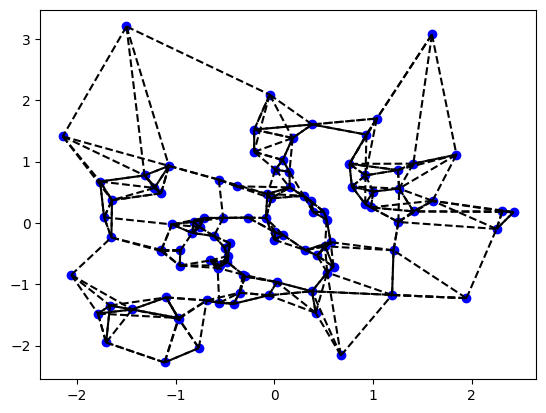

In [20]:
# siatka połączeń
plt.scatter(X[x_1],X[x_2],color='blue')
for i in range(X.shape[0]):
    for j in indices[i]:
        plt.plot([X.loc[i,x_1],X.loc[j,x_1]],[X.loc[i,x_2], X.loc[j,x_2]],'k--')
plt.show()